In [17]:
import pandas as pd
import numpy as np
import seaborn as sn
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, classification_report
from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
import tensorflow
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from micromlgen import port

In [18]:
def printConfusionMatrix(cm, labels, title=""):

    df_cm = pd.DataFrame(cm, labels, labels)
    sn.set(rc={'figure.figsize':(6,4)})
    sn.set(font_scale=1.4) # for label size
    ax = sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 16})
    ax.set_title(title)
    ax.set(xlabel='Predicted Labels', ylabel='Real Labels')


    pyplot.show()

In [19]:
RANDOM_SEED = 42

In [20]:
np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)

In [21]:

with open('data/X-10-25.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y-10-25.pkl', 'rb') as f:
    y = pickle.load(f)
    
'''

with open('data/X-1-2.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y-1-2.pkl', 'rb') as f:
    y = pickle.load(f)
'''  
''' 
with open('data/X-25_50-50_25.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y-25_50-50_25.pkl', 'rb') as f:
    y = pickle.load(f)
''' 
'''
with open('data/X-all.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y-all.pkl', 'rb') as f:
    y = pickle.load(f)
    '''

"\nwith open('data/X-all.pkl', 'rb') as f:\n    X = pickle.load(f)\n\nwith open('data/y-all.pkl', 'rb') as f:\n    y = pickle.load(f)\n    "

In [22]:
print(X)

[[-0.05  0.04  0.97 ... -0.05  0.04  0.97]
 [-0.03  0.03  0.97 ... -0.03  0.04  0.98]
 [-0.05  0.04  0.96 ... -0.04  0.02  0.97]
 ...
 [-0.07 -0.02  0.98 ... -0.07 -0.01  0.99]
 [-0.07 -0.03  0.98 ... -0.07 -0.01  0.99]
 [-0.07 -0.03  0.97 ... -0.07 -0.01  0.98]]


In [23]:
y.shape

(2778,)

Split in train and test sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

In [25]:
#y_train = pd.get_dummies(y_train).values
#y_test = pd.get_dummies(y_test).values

In [26]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [27]:
X_train.shape[1]

60

## Models Evaluation

### RF

In [28]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
#model = MLPClassifier(random_state=42)

In [29]:
print(X_train)
model.fit(X_train, y_train)

[[-0.05  0.04  0.98 ... -0.03  0.03  0.98]
 [-0.05  0.02  0.98 ... -0.04  0.04  0.98]
 [-0.03  0.02  0.98 ... -0.05  0.04  0.98]
 ...
 [-0.03  0.03  0.98 ... -0.04  0.04  0.98]
 [-0.03  0.03  0.98 ... -0.04  0.01  0.98]
 [-0.06 -0.02  0.99 ... -0.07 -0.02  0.98]]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
y_pred = model.predict(X_test)

In [31]:
f1_score(y_test, y_pred, average="weighted")

1.0

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       274
           1       1.00      1.00      1.00       282

    accuracy                           1.00       556
   macro avg       1.00      1.00      1.00       556
weighted avg       1.00      1.00      1.00       556



In [33]:
print(confusion_matrix(y_test, y_pred))

[[274   0]
 [  0 282]]


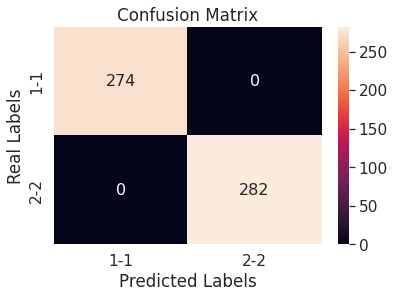

In [34]:
labels = ["1-1", "2-2"]
printConfusionMatrix(confusion_matrix(y_test, y_pred), labels, "Confusion Matrix")

In [35]:
with open('rf_model_paper_3.h', 'w') as f:  # change path if needed
    f.write(port(model, optimize=False))

In [36]:
with open('models/rf_model_paper_3.pkl', 'wb') as f:
    pickle.dump(model, f)
